this program shows the 2-d and 3-d tsne plot of DICE which is a state of art number embedding method

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import math
import numpy as np

%matplotlib inline

In [2]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO) 
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [3]:
class DICE:
    '''
    DICE class turns numbers into their respective DICE embeddings
    
    Since the cosine function decreases monotonically between 0 and pi, simply employ a linear mapping
    to map distances s_n \in [0, |a-b|] to angles \theta \in [0, pi]
    '''
    def __init__(self, d=2, min_bound=0, max_bound=100, norm="l2"):
        self.d = d # By default, we build DICE-2
        self.min_bound = min_bound
        self.max_bound = max_bound
        self.norm = norm  # Restrict x and y to be of unit length
        self.M = np.random.normal(0, 1, (self.d, self.d))
        self.Q, self.R = np.linalg.qr(self.M, mode="complete")  # QR decomposition for orthonormal basis, Q
    
    def __linear_mapping(self, num):
        '''Eq. (4) from DICE'''
        norm_diff = num / abs(self.min_bound - self.max_bound)
        theta = norm_diff * math.pi
        return theta
    
    def make_dice(self, num):
        r = 1
        theta = self.__linear_mapping(num)
        if self.d == 2:
            # DICE-2
            polar_coord = np.array([r*math.cos(theta), r*math.sin(theta)])
        elif self.d > 2:
            # DICE-D
            polar_coord = np.array([math.sin(theta)**(dim-1) * math.cos(theta) if dim < self.d else math.sin(theta)**(self.d) for dim in range(1, self.d+1)])
        else:
            raise ValueError("Wrong value for `d`. `d` should be greater than or equal to 2.")
            
        dice = np.dot(self.Q, polar_coord)  # DICE-D embedding for `num`
        
        # return dice.tolist()
        return dice

In [6]:
dice = DICE(d=100, min_bound=0, max_bound=2000)
embedding_matrix=np.zeros((1000, 100))
for i in range(0,1000):
    embedding_matrix[i]=dice.make_dice(i)

In [10]:
embeddings_tSNE = TSNE(n_components=3).fit_transform(embedding_matrix)
embeddings_tSNE = pd.DataFrame(embeddings_tSNE, columns=['tSNE_1', 'tSNE_2','tSNE_3'])
embeddings_tSNE['magnitude'] = [i for i in range(0,1000)]
embeddings_tSNE

C:\Users\xwang\anaconda3\envs\4222\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\xwang\anaconda3\envs\4222\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


,tSNE_1,tSNE_2,tSNE_3,magnitude
0,-7.701397,11.969337,5.220165,0
1,-7.664618,11.955276,5.189941,1
2,-7.645634,11.949394,5.139657,2
3,-7.576202,12.002215,5.089563,3
4,-7.715918,11.945382,4.940505,4
...,...,...,...,...
995,-13.450863,4.088712,-1.385182,995
996,-13.551600,3.994303,-1.517983,996
997,-13.585367,4.030714,-1.560349,997
998,-13.561675,4.058179,-1.615970,998


In [12]:
fig = plt.figure(figsize=(100,100))
ax = fig.add_subplot(projection='3d')
x1=embeddings_tSNE.tSNE_1
y1=embeddings_tSNE.tSNE_2
z1=embeddings_tSNE.tSNE_3
#ax.plot(x1, y1, z1)
ax.scatter(x1, y1, z1, c=z1, marker='^',s=1000)
plt.show()

In [13]:
embeddings_tSNE = TSNE(n_components=2).fit_transform(embedding_matrix)
embeddings_tSNE = pd.DataFrame(embeddings_tSNE, columns=['tSNE_1', 'tSNE_2'])
embeddings_tSNE['magnitude'] = [i for i in range(0,1000)]
embeddings_tSNE[:10]

C:\Users\xwang\anaconda3\envs\4222\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\xwang\anaconda3\envs\4222\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


,tSNE_1,tSNE_2,magnitude
0,-3.374629,-39.980865,0
1,-3.401123,-39.811230,1
2,-3.125561,-40.050629,2
3,-3.337497,-39.511551,3
4,-3.265358,-39.428413,4
5,-2.803491,-39.984924,5
6,-2.718682,-39.917637,6
7,-3.019167,-39.240440,7
8,-2.568577,-39.760109,8
9,-2.822494,-39.146183,9


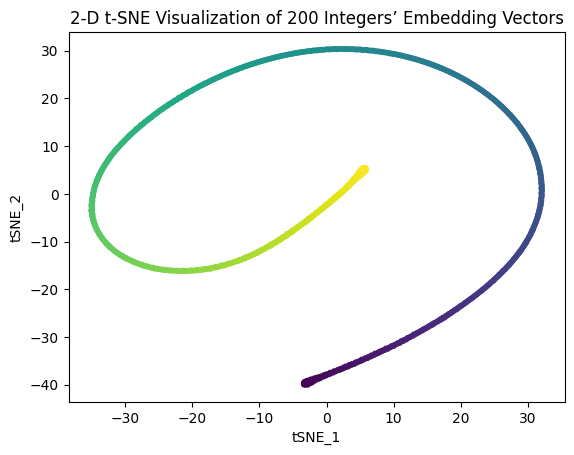

In [14]:
plt.scatter(embeddings_tSNE.tSNE_1, embeddings_tSNE.tSNE_2,  c=embeddings_tSNE.magnitude, s=10)
plt.title('2-D t-SNE Visualization of 200 Integers’ Embedding Vectors')
plt.xlabel('tSNE_1')
plt.ylabel('tSNE_2')
plt.show()